<a href="https://colab.research.google.com/github/ReidelVichot/DEFreightProfiles/blob/main/Truck_Volume_prediction7-9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
# Import CCD from google drive Source: Census
ccd_name = "/content/drive/My Drive/FreightProfiles/tl_rd22_10_cousub (1)/tl_rd22_10_cousub.shp"
ccd =  gpd.read_file(ccd_name)
ccd = ccd.to_crs("EPSG:2235")
# Import tracks from google drive
# Source: Fist Maps
# https://de-firstmap-delaware.hub.arcgis.com/datasets/railroad-rail-lines/explore?location=39.655622%2C-75.765561%2C13.56
rail_name = "/content/drive/MyDrive/FreightProfiles/Delaware_Multimodal_2.0_tracks/Delaware_Multimodal_2.0.shp"
rail = gpd.read_file(rail_name)
rail = rail.to_crs("EPSG:2235")
cols = ['NAME','geometry']
ccd = ccd[cols]
cols = ['TRACK_TYPE', 'STATUS', 'LINE_ID', 'OWNER', 'geometry']
rail = rail[cols]

In [216]:
taz_name = "/content/drive/MyDrive/temp_dstep23/TAZ_analysis/DE_TAZ_2021_TRKGEN_region.shp"
taz = gpd.read_file(taz_name)
taz = taz.to_crs("EPSG:2235")

In [217]:
taz["FIS"] = taz['TRN_UTL_20'] + taz['LE_HOSP_20'] + taz['CONS_20'] + taz['MANU_20']
taz["SIS"] = taz['OT_SVCS_20'] + taz['ED_HEALTH_'] + taz['FINANCE_20'] + taz['PRO_BUS_20'] + taz['LE_HOSP_20'] + taz['INFO_20']
taz["FIS_per"] = taz["FIS"]/taz['TOT_20']*100
taz_grpd = taz.groupby("CCD").sum(numeric_only = True)
taz_grpd["FIS_per"] = taz_grpd["FIS"]/taz_grpd["TOT_20"]*100
taz_grpd["FIS_capita"] = taz_grpd["FIS"]/taz_grpd["POP_20"]
taz_grpd.reset_index(inplace=True)
taz_grpd.at[ 9, "CCD"] = "Lower Christiana"
taz_grpd.at[25, "CCD"] = "Upper Christiana"
taz_grpd.at[12, "CCD"] = "Middletown-Odessa"
taz_grpd.at[20, "CCD"] = "Pike Creek-Central Kirkwood"
ccd = ccd.merge(taz_grpd, left_on="NAME", right_on="CCD")

In [218]:
CFC = gpd.read_file("/content/drive/MyDrive/FreightProfiles/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0 (1)/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0.shp")
CFC = CFC.to_crs("EPSG:2235")

In [219]:
CoastalCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/CoastalCorridor/Delaware_Multimodal_2.0.shp")
CoastalCorridor = CoastalCorridor.to_crs("EPSG:2235")

MetroCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/MetroCorridor/Delaware_Multimodal_2.0.shp")
MetroCorridor = MetroCorridor.to_crs("EPSG:2235")

LewesCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/LewesCorridor/Delaware_Multimodal_2.0.shp")
LewesCorridor = LewesCorridor.to_crs("EPSG:2235")

BayCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/BayCorridor/Delaware_Multimodal_2.0.shp")
BayCorridor = BayCorridor.to_crs("EPSG:2235")

PiedmontCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/PiedmontCorridor/Delaware_Multimodal_2.0.shp")
PiedmontCorridor = PiedmontCorridor.to_crs("EPSG:2235")

In [220]:
truck_traffic = pd.read_csv("/content/drive/MyDrive/FreightProfiles/StreetLight/1669875_All_CCDsAvailable_trucks_2020/1669875_All_CCDsAvailable_trucks_2020/1669875_All_CCDsAvailable_trucks_2020_odg_comm.csv")

In [221]:
cols = ['Vehicle Weight', 'Origin Zone ID', 'Origin Zone Name',
        'Origin Zone Source', 'Destination Zone ID', 'Destination Zone Name',
        'Destination Zone Source', 'Day Type', 'Day Part',
        'Average Daily O-D Traffic (StL Index)',
        'Average Daily Origin Zone Traffic (StL Index)',
       'Average Daily Destination Zone Traffic (StL Index)',
       'Avg Travel Time (sec)']

In [222]:
truck_traffic = truck_traffic[cols]

In [223]:
ccd["NAME"].values

array(['Lewes', 'Millsboro', 'Central Kent', 'Smyrna',
       'Middletown-Odessa', 'New Castle', 'Pike Creek-Central Kirkwood',
       'Wilmington', 'Lower Christiana', 'Piedmont', 'Upper Christiana',
       'Georgetown', 'Milford South', 'Seaford', 'Selbyville-Frankford',
       'Laurel-Delmar', 'Milton', 'Bridgeville-Greenwood', 'Dover',
       'Kenton', 'Felton', 'Milford North', 'Harrington', 'Brandywine',
       'Glasgow', 'Red Lion', 'Newark'], dtype=object)

In [224]:
truck_traffic2 = truck_traffic[truck_traffic["Day Type"]=="0: All Days (M-Su)"][truck_traffic['Day Part']=="00: All Day (12am-12am)"][truck_traffic['Vehicle Weight']=="Medium"].groupby("Destination Zone Name").sum(numeric_only=True).reset_index()

<ipython-input-224-3d4bc846a7b7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  truck_traffic2 = truck_traffic[truck_traffic["Day Type"]=="0: All Days (M-Su)"][truck_traffic['Day Part']=="00: All Day (12am-12am)"][truck_traffic['Vehicle Weight']=="Medium"].groupby("Destination Zone Name").sum(numeric_only=True).reset_index()
<ipython-input-224-3d4bc846a7b7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  truck_traffic2 = truck_traffic[truck_traffic["Day Type"]=="0: All Days (M-Su)"][truck_traffic['Day Part']=="00: All Day (12am-12am)"][truck_traffic['Vehicle Weight']=="Medium"].groupby("Destination Zone Name").sum(numeric_only=True).reset_index()


In [225]:
truck_traffic_ccd = truck_traffic2[truck_traffic2["Destination Zone Name"].isin(ccd["NAME"].values)][['Destination Zone Name', 'Average Daily O-D Traffic (StL Index)']]

In [226]:
truck_traffic_ccd

,Destination Zone Name,Average Daily O-D Traffic (StL Index)
12752,Brandywine,80891
12753,Glasgow,34758
12754,Lower Christiana,57720
12755,Middletown-Odessa,67748
12756,New Castle,146032
12757,Newark,76117
12758,Piedmont,28466
12759,Pike Creek-Central Kirkwood,29027
12760,Red Lion,18492
12761,Upper Christiana,49069


In [227]:
ccd  = ccd.merge(truck_traffic_ccd, left_on="CCD", right_on="Destination Zone Name")

<Axes: xlabel='POP_20', ylabel='Average Daily O-D Traffic (StL Index)'>

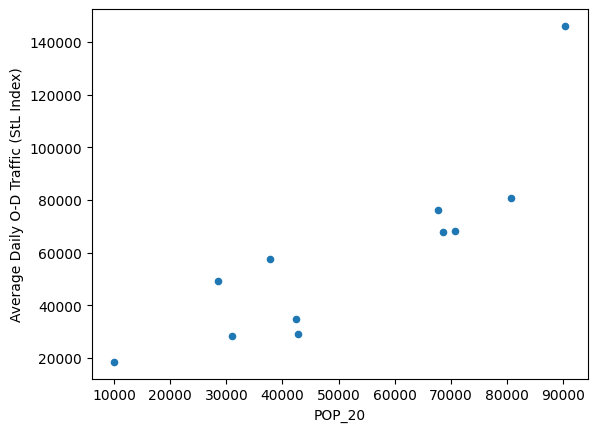

In [228]:
ccd.plot(x="POP_20",y="Average Daily O-D Traffic (StL Index)", kind="scatter")

<Axes: xlabel='FIS_capita', ylabel='Average Daily O-D Traffic (StL Index)'>

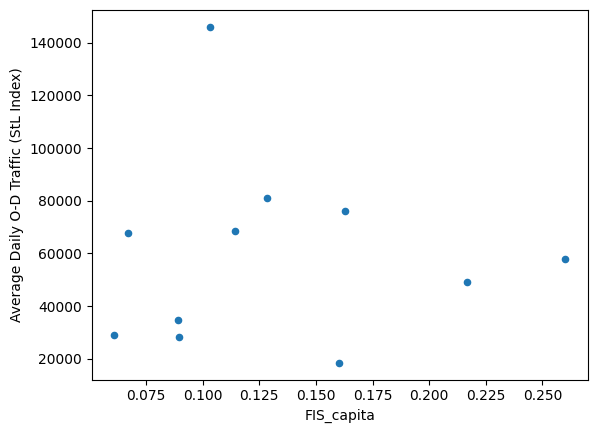

In [229]:
ccd.plot(x="FIS_capita",y="Average Daily O-D Traffic (StL Index)", kind="scatter")

In [230]:
CFC_ccd = gpd.overlay(CFC, ccd, how="intersection")
CFC_ccd["length_CFC"] = CFC_ccd.length
CFC_ccd = CFC_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_CFC"]]

In [231]:
PiedmontCorridor_ccd = gpd.overlay(PiedmontCorridor, ccd, how="intersection", keep_geom_type=True)
PiedmontCorridor_ccd["length_Piedmont"] = PiedmontCorridor_ccd.length
PiedmontCorridor_ccd = PiedmontCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Piedmont"]]

In [232]:
CoastalCorridor_ccd = gpd.overlay(CoastalCorridor, ccd, how="intersection", keep_geom_type=True)
CoastalCorridor_ccd["length_Coastal"] = CoastalCorridor_ccd.length
CoastalCorridor_ccd = CoastalCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Coastal"]]

In [233]:
MetroCorridor_ccd = gpd.overlay(MetroCorridor, ccd, how="intersection", keep_geom_type=True)
MetroCorridor_ccd["length_Metro"] = MetroCorridor_ccd.length
MetroCorridor_ccd = MetroCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Metro"]]

In [234]:
#--- Empty
LewesCorridor_ccd = gpd.overlay(LewesCorridor, ccd, how="intersection", keep_geom_type=True)
LewesCorridor_ccd["length_Lewes"] = LewesCorridor_ccd.length
LewesCorridor_ccd = LewesCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Lewes"]]

In [235]:
BayCorridor_ccd = gpd.overlay(BayCorridor, ccd, how="intersection", keep_geom_type=True)
BayCorridor_ccd["length_Bay"] = BayCorridor_ccd.length
BayCorridor_ccd = BayCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Bay"]]

In [236]:
ccd = ccd.merge(CFC_ccd, on="NAME", how="left").fillna(0)
ccd = ccd.merge(PiedmontCorridor_ccd, on="NAME", how="left").fillna(0)
ccd = ccd.merge(CoastalCorridor_ccd, on="NAME", how="left").fillna(0)
ccd = ccd.merge(MetroCorridor_ccd, on="NAME", how="left").fillna(0)
# Empty
#ccd = ccd.merge(LewesCorridor_ccd, left_on="CCD", right_on="NAME", how="left")
ccd = ccd.merge(BayCorridor_ccd, on="NAME", how="left").fillna(0)

In [237]:
# Before remove Lewes Corridor
#ccd["freight_length"] = ccd["length_CFC"] + ccd["length_Piedmont"] + ccd["length_Coastal"] + ccd["length_Metro"] + ccd["length_Lewes"] + ccd["length_Bay"]
ccd["freight_length"] = ccd["length_CFC"] + ccd["length_Piedmont"] + ccd["length_Coastal"] + ccd["length_Metro"] + ccd["length_Bay"]

In [238]:
ccd = ccd.drop(columns=["NAME"])

In [239]:
rail_ccd = gpd.overlay(rail, ccd, how="intersection", keep_geom_type=True)
rail_ccd["rail_length"] = rail_ccd.length
rail_ccd = rail_ccd.groupby("CCD").sum(numeric_only=True).reset_index()[["CCD","rail_length"]]

In [240]:
ccd = ccd.merge(rail_ccd, on="CCD", how="left").fillna(0)

In [241]:
# Adding parking values
dir = "/content/drive/MyDrive/FreightProfiles/"
truck_parking_name =  dir + "DE_Undesig_Clusters/DE_Undesig_Clusters/Delaware_Undesig_Clusters.shp"
truck_parking =  gpd.read_file(truck_parking_name)
truck_parking = truck_parking.to_crs("EPSG:2235")
truck_parking["geometry"] = truck_parking.centroid


In [242]:
truck_parking_ccd = gpd.overlay(truck_parking, ccd[["CCD","geometry"]], how="intersection")

In [243]:
count_parking = truck_parking_ccd.groupby("CCD").count()[["geometry"]].reset_index()
count_parking.columns = ["CCD","count_parking"]

count_spots = truck_parking_ccd.groupby("CCD").sum(numeric_only=True).reset_index()
count_spots.columns = ["CCD","count_spots"]

ccd = ccd.merge(count_parking, on="CCD", how="left").fillna(0)
ccd = ccd.merge(count_spots, on="CCD", how="left").fillna(0)

In [244]:
ccd.rename(columns={"Average Daily O-D Traffic (StL Index)":"StL_Index"}, inplace=True)

In [245]:
# -- import statmodels using the formula api
import statsmodels.formula.api as sm
import statsmodels.api as smf

# -- first build the model
model = sm.rlm("StL_Index ~ TOT_Units_ + FIS + freight_length + rail_length", data=ccd, M=smf.robust.norms.HuberT())

# -- now fit the model to the data
result = model.fit()

# -- summarize the model fit
print(result.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:              StL_Index   No. Observations:                   11
Model:                            RLM   Df Residuals:                        6
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 10 Jul 2024                                         
Time:                        01:20:59                                         
No. Iterations:                     8                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6502.0442   4400.971      1.

In [246]:
# -- import statmodels using the formula api
import statsmodels.formula.api as sm

# -- first build the model
model = sm.ols("StL_Index ~ TOT_Units_ + FIS + freight_length + rail_length", data=ccd)

# -- now fit the model to the data
result = model.fit()

# -- summarize the model fit
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              StL_Index   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     11.77
Date:                Wed, 10 Jul 2024   Prob (F-statistic):            0.00528
Time:                        01:20:59   Log-Likelihood:                -118.37
No. Observations:                  11   AIC:                             246.7
Df Residuals:                       6   BIC:                             248.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1533.5615   1.17e+04      0.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [247]:
ccd.columns

Index(['geometry', 'CCD', 'POP_20', 'TOT_Units_', 'Occ_HH_20', 'Vacant_20',
       'Tot_GC_20', 'TOT_Inst_2', 'TOT_nonins', 'NATRES_20', 'CONS_20',
       'MANU_20', 'WHL_RET_20', 'TRN_UTL_20', 'INFO_20', 'FINANCE_20',
       'PRO_BUS_20', 'ED_HEALTH_', 'LE_HOSP_20', 'OT_SVCS_20', 'PUBADM_20',
       'FOOD_SVC_2', 'FIS_20', 'TOT_20', 'EMP_19', 'Adj_EMP_20', 'FIS', 'SIS',
       'FIS_per', 'FIS_capita', 'Destination Zone Name', 'StL_Index',
       'length_CFC', 'length_Piedmont', 'length_Coastal', 'length_Metro',
       'length_Bay', 'freight_length', 'rail_length', 'count_parking',
       'count_spots'],
      dtype='object')

In [ ]:
# -- Model 1
# -- first build the model
model = sm.ols("StL_Index ~ FIS +  count_parking", data=ccd)

# -- now fit the model to the data
result = model.fit()

# -- summarize the model fit
print(result.summary())

In [266]:
# -- Model 2
# -- first build the model
model = sm.ols("StL_Index ~ TOT_Units_ + count_parking", data=ccd)

# -- now fit the model to the data
result = model.fit()

# -- summarize the model fit
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              StL_Index   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     12.45
Date:                Wed, 10 Jul 2024   Prob (F-statistic):            0.00350
Time:                        02:12:09   Log-Likelihood:                -122.59
No. Observations:                  11   AIC:                             251.2
Df Residuals:                       8   BIC:                             252.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9781.1344   1.42e+04      0.689

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
